#**IMPORT LIBRARY**

In [ ]:
# Mengimpor library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# mengimpor sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition
import sklearn.cluster as cluster

In [ ]:
# import graph library
import matplotlib.pyplot as plt
import plotly.express as pw

In [ ]:
# mengimpor stats library
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **READ DATA**




In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengganti Folder
%cd '/content/drive/My Drive/Class-20210420-01/Achdiyat Kusuma_Day24'

/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/Achdiyat Kusuma_Day24


In [ ]:
!ls

'Achdiyat Game FP.ipynb'	       telecom_users.csv
'Achdiyat Kusuma Unsupervised.ipynb'   Untitled0.ipynb
 Final_Project.ipynb		       Video_Games_Sales.csv


In [ ]:
# Membaca Data
df = pd.read_csv('Video_Games_Sales.csv')

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Menampilkan 5 baris Data Awal
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menampilkan informasi umum dari Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# Menampilkan jumlah baris dan kolom pada dataframe df
print(df.shape)

(16719, 16)


In [ ]:
#Cek unique Value

uniques = pd.DataFrame(columns=["Feature", "Uniques", "Num_Uniques"])
for i in range(len(df.columns)):
  uniques.loc[i] = [df.columns[i]] + [df[df.columns[i]].unique()] + [df[df.columns[i]].nunique()]

uniques

,Feature,Uniques,Num_Uniques
0,Name,"[Wii Sports, Super Mario Bros., Mario Kart Wii...",11562
1,Platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",31
2,Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989....",39
3,Genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",12
4,Publisher,"[Nintendo, Microsoft Game Studios, Take-Two In...",581
5,NA_Sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",402
6,EU_Sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",307
7,JP_Sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",244
8,Other_Sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",155
9,Global_Sales,"[82.53, 40.24, 35.52, 32.77, 31.37, 30.26, 29....",629


In [ ]:
# Menampilkan Nama Kolom pada dataframe df
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfdrop2 = df.copy()
dfdrop2.drop(df[df['Global_Sales'] < 0.1].index, inplace = True)

In [ ]:
print(dfdrop2.shape)

(10827, 16)


In [ ]:
dfdrop2[dfdrop2.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,MX SuperFly featuring Ricky Carmichael,XB,2002.0,Racing,THQ,0.07,0.02,0.00,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10816,Gokuhou!! Mecha Mote Iinchou: MM Town de Mirac...,DS,2009.0,Simulation,Konami Digital Entertainment,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10818,Kuroko's Basketball: Miracle Game,3DS,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10820,Lego Star Wars: The Force Awakens,PSV,2016.0,Action,Warner Bros. Interactive Entertainment,0.01,0.06,0.01,0.02,0.10,NaN,NaN,7.1,13.0,TT Games,E10+


In [ ]:
# membuat variable untuk kolom dengan nilai numerik
numeric_column = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

In [ ]:
dfdrop2[numeric_column].head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



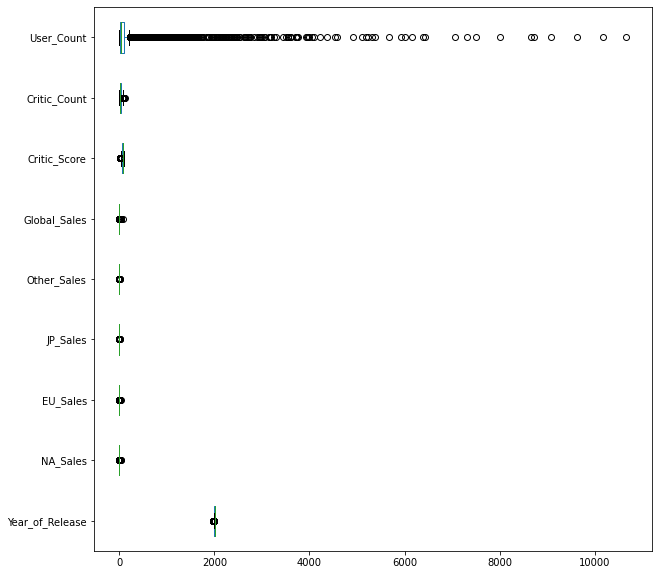

In [ ]:
dfdrop2.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [ ]:
# get IQR for each numeric column
Q1 = dfdrop2[numeric_column].quantile(0.25)
Q3 = dfdrop2[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Year_of_Release    2002.00
NA_Sales              0.08
EU_Sales              0.01
JP_Sales              0.00
Other_Sales           0.01
Global_Sales          0.18
Critic_Score         62.00
Critic_Count         14.00
User_Count           12.00
Name: 0.25, dtype: float64

Q3:
 Year_of_Release    2010.00
NA_Sales              0.39
EU_Sales              0.20
JP_Sales              0.08
Other_Sales           0.06
Global_Sales          0.76
Critic_Score         81.00
Critic_Count         41.00
User_Count           93.75
Name: 0.75, dtype: float64

IQR:
 Year_of_Release     8.00
NA_Sales            0.31
EU_Sales            0.19
JP_Sales            0.08
Other_Sales         0.05
Global_Sales        0.58
Critic_Score       19.00
Critic_Count       27.00
User_Count         81.75
dtype: float64

Min:
 Year_of_Release    1990.000
NA_Sales             -0.385
EU_Sales             -0.275
JP_Sales             -0.120
Other_Sales          -0.065
Global_Sales         -0.690
Critic_Score         33.500

In [ ]:
# remove outlier
non_outlier_df = dfdrop2.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [ ]:
non_outlier_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1366,Sonic's Ultimate Genesis Collection,X360,2009.0,Misc,Sega,0.85,0.43,0.00,0.13,1.41,79.0,45.0,8.5,40.0,Backbone Entertainment,E10+
1412,Call of Duty: Black Ops,Wii,2010.0,Shooter,Activision,0.80,0.45,0.00,0.12,1.37,80.0,25.0,5.8,87.0,Treyarch,M
1432,Gardening Mama,DS,2009.0,Puzzle,505 Games,0.79,0.42,0.01,0.13,1.35,60.0,17.0,9.3,4.0,Taito Corporation,E
1454,Doom 3,XB,2005.0,Shooter,Activision,0.85,0.43,0.00,0.06,1.34,88.0,71.0,7.4,116.0,Vicarious Visions,M
1487,Petz Wild Animals: Dolphinz,DS,2007.0,Simulation,Ubisoft,0.71,0.48,0.00,0.13,1.32,NaN,NaN,tbd,NaN,Magic Pockets,E


In [ ]:
non_outlier_df.shape

(7365, 16)

In [ ]:
non_outlier_df[non_outlier_df.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1487,Petz Wild Animals: Dolphinz,DS,2007.0,Simulation,Ubisoft,0.71,0.48,0.00,0.13,1.32,NaN,NaN,tbd,NaN,Magic Pockets,E
1554,Road Rash,PS,1995.0,Racing,Electronic Arts,0.71,0.48,0.00,0.08,1.27,NaN,NaN,NaN,NaN,NaN,NaN
1560,Mystery Case Files: MillionHeir,DS,2008.0,Adventure,Nintendo,0.75,0.39,0.00,0.12,1.27,65.0,28.0,tbd,NaN,Griptonite Games,E
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.69,0.42,0.00,0.12,1.24,76.0,8.0,7.8,13.0,Traveller's Tales,E10+
1617,Cars 2,DS,2011.0,Racing,Disney Interactive Studios,0.68,0.40,0.04,0.11,1.23,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,MX SuperFly featuring Ricky Carmichael,XB,2002.0,Racing,THQ,0.07,0.02,0.00,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10816,Gokuhou!! Mecha Mote Iinchou: MM Town de Mirac...,DS,2009.0,Simulation,Konami Digital Entertainment,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10818,Kuroko's Basketball: Miracle Game,3DS,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10820,Lego Star Wars: The Force Awakens,PSV,2016.0,Action,Warner Bros. Interactive Entertainment,0.01,0.06,0.01,0.02,0.10,NaN,NaN,7.1,13.0,TT Games,E10+


In [ ]:
# handle missing data - replace values with mean - multiple column - string column
replaced_value_df = non_outlier_df.copy()
replaced_value_df.fillna(method='bfill',axis=0,inplace=True)
replaced_value_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1366,Sonic's Ultimate Genesis Collection,X360,2009.0,Misc,Sega,0.85,0.43,0.00,0.13,1.41,79.0,45.0,8.5,40.0,Backbone Entertainment,E10+
1412,Call of Duty: Black Ops,Wii,2010.0,Shooter,Activision,0.80,0.45,0.00,0.12,1.37,80.0,25.0,5.8,87.0,Treyarch,M
1432,Gardening Mama,DS,2009.0,Puzzle,505 Games,0.79,0.42,0.01,0.13,1.35,60.0,17.0,9.3,4.0,Taito Corporation,E
1454,Doom 3,XB,2005.0,Shooter,Activision,0.85,0.43,0.00,0.06,1.34,88.0,71.0,7.4,116.0,Vicarious Visions,M
1487,Petz Wild Animals: Dolphinz,DS,2007.0,Simulation,Ubisoft,0.71,0.48,0.00,0.13,1.32,73.0,32.0,tbd,25.0,Magic Pockets,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Skylanders Imaginators,XOne,2016.0,Platform,Activision,0.05,0.04,0.00,0.01,0.10,78.0,14.0,6,8.0,Toys for Bob,E10+
10823,Minority Report: Everybody Runs,XB,2002.0,Action,Activision,0.07,0.02,0.00,0.00,0.10,54.0,18.0,5,4.0,Treyarch,T
10824,NASCAR,PSP,2006.0,Racing,Electronic Arts,0.09,0.00,0.00,0.01,0.10,66.0,13.0,5.3,6.0,Exient Entertainment,E
10825,The Voice,WiiU,2014.0,Action,Activision,0.08,0.00,0.00,0.01,0.10,62.0,4.0,7.8,10.0,Spike Chunsoft,T


In [ ]:
replaced_value_df[replaced_value_df.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [ ]:
replaced_value_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1366,Sonic's Ultimate Genesis Collection,X360,2009.0,Misc,Sega,0.85,0.43,0.00,0.13,1.41,79.0,45.0,8.5,40.0,Backbone Entertainment,E10+
1412,Call of Duty: Black Ops,Wii,2010.0,Shooter,Activision,0.80,0.45,0.00,0.12,1.37,80.0,25.0,5.8,87.0,Treyarch,M
1432,Gardening Mama,DS,2009.0,Puzzle,505 Games,0.79,0.42,0.01,0.13,1.35,60.0,17.0,9.3,4.0,Taito Corporation,E
1454,Doom 3,XB,2005.0,Shooter,Activision,0.85,0.43,0.00,0.06,1.34,88.0,71.0,7.4,116.0,Vicarious Visions,M
1487,Petz Wild Animals: Dolphinz,DS,2007.0,Simulation,Ubisoft,0.71,0.48,0.00,0.13,1.32,73.0,32.0,tbd,25.0,Magic Pockets,E


In [ ]:
replaced_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7365 entries, 1366 to 10826
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7365 non-null   object 
 1   Platform         7365 non-null   object 
 2   Year_of_Release  7365 non-null   float64
 3   Genre            7365 non-null   object 
 4   Publisher        7365 non-null   object 
 5   NA_Sales         7365 non-null   float64
 6   EU_Sales         7365 non-null   float64
 7   JP_Sales         7365 non-null   float64
 8   Other_Sales      7365 non-null   float64
 9   Global_Sales     7365 non-null   float64
 10  Critic_Score     7365 non-null   float64
 11  Critic_Count     7365 non-null   float64
 12  User_Score       7365 non-null   object 
 13  User_Count       7365 non-null   float64
 14  Developer        7365 non-null   object 
 15  Rating           7365 non-null   object 
dtypes: float64(9), object(7)
memory usage: 978.2+ KB


In [ ]:
print(replaced_value_df.shape)

(7365, 16)


In [ ]:
#Cek unique Value setelah Outlier dan Missing value

uniques2 = pd.DataFrame(columns=["Feature", "Uniques", "Num_Uniques"])
for i in range(len(replaced_value_df.columns)):
  uniques2.loc[i] = [replaced_value_df.columns[i]] + [replaced_value_df[replaced_value_df.columns[i]].unique()] + [replaced_value_df[replaced_value_df.columns[i]].nunique()]

uniques2

,Feature,Uniques,Num_Uniques
0,Name,"[Sonic's Ultimate Genesis Collection, Call of ...",5255
1,Platform,"[X360, Wii, DS, XB, PS2, PS, GBA, GB, 3DS, GC,...",28
2,Year_of_Release,"[2009.0, 2010.0, 2005.0, 2007.0, 2004.0, 2012....",27
3,Genre,"[Misc, Shooter, Puzzle, Simulation, Sports, Pl...",12
4,Publisher,"[Sega, Activision, 505 Games, Ubisoft, Electro...",321
5,NA_Sales,"[0.85, 0.8, 0.79, 0.71, 0.78, 0.84, 0.75, 0.69...",86
6,EU_Sales,"[0.43, 0.45, 0.42, 0.48, 0.41, 0.44, 0.47, 0.3...",49
7,JP_Sales,"[0.0, 0.01, 0.05, 0.04, 0.12, 0.08, 0.14, 0.02...",21
8,Other_Sales,"[0.13, 0.12, 0.06, 0.11, 0.07, 0.04, 0.08, 0.0...",14
9,Global_Sales,"[1.41, 1.37, 1.35, 1.34, 1.32, 1.31, 1.3, 1.29...",126


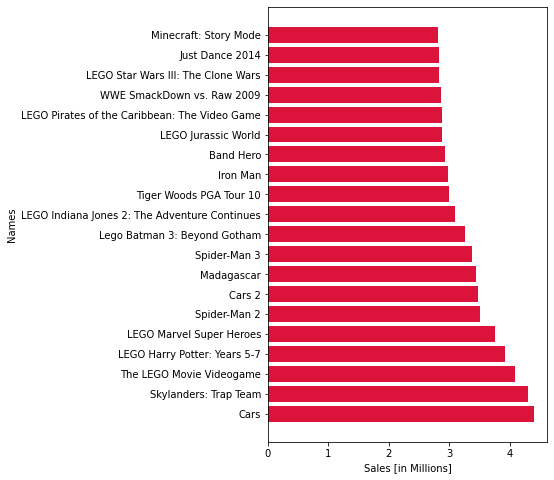

In [ ]:
y=replaced_value_df.groupby("Name").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(5,8))
plt.barh(y.index, y.values, color = 'Crimson')
plt.yticks(y.index, size=10)
plt.xlabel('Sales [in Millions]')
plt.ylabel('Names')
plt.show()

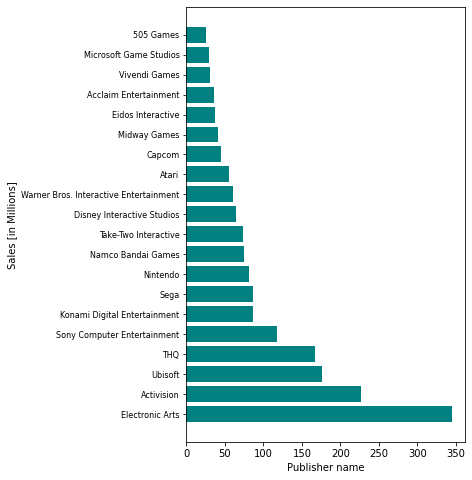

In [ ]:
y=replaced_value_df.groupby("Publisher").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(5,8))
plt.barh(y.index, y.values, color = 'teal')
plt.yticks(y.index,size=8)
plt.ylabel('Sales [in Millions]')
plt.xlabel('Publisher name')
plt.show()

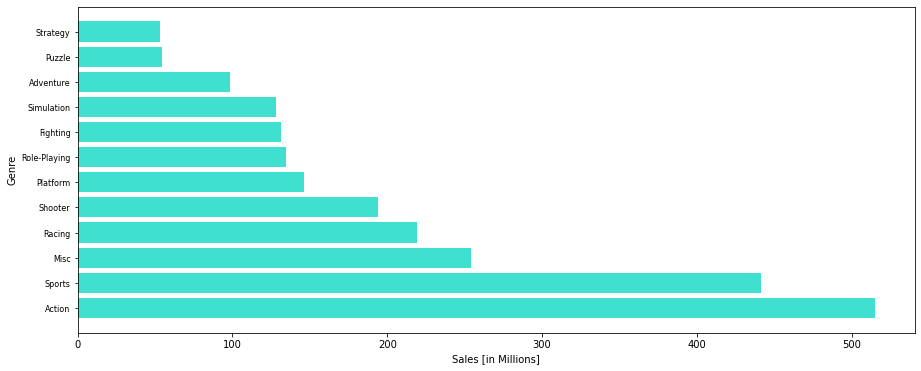

In [ ]:
y=replaced_value_df.groupby("Genre").Global_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.barh(y.index,y.values, color='turquoise')
plt.yticks(y.index,size=8)
plt.xlabel('Sales [in Millions]')
plt.ylabel('Genre')
plt.show()

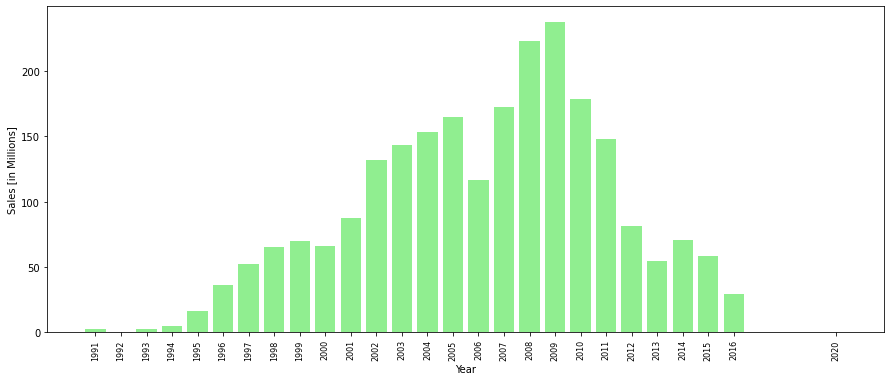

In [ ]:
y=replaced_value_df.groupby("Year_of_Release").Global_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values, color='lightgreen')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in Millions]')
plt.xlabel('Year')
plt.show()

In [ ]:
dfsales = df.loc[:,'Name' : 'Global_Sales']
dfsales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


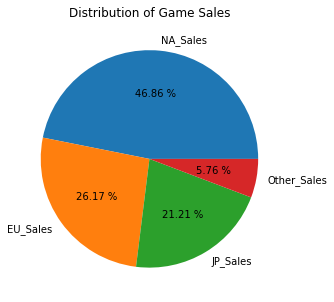

In [ ]:
x=dfsales.groupby("Year_of_Release").sum()
x=x.drop(columns='Global_Sales')
year=2000
td=dict(x.loc[year])
plt.figure(figsize=(7,5))
plt.title("Distribution of Game Sales")
plt.pie(td.values(),autopct='%.2f %%',labels=td.keys())
plt.show()

In [ ]:
pw.pie(replaced_value_df,'Genre',title='Distribution of Genre')

Text(0.5, 0, 'Year of Release')

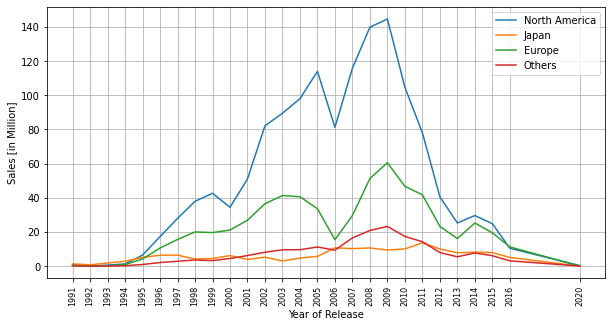

In [ ]:
us=replaced_value_df.groupby('Year_of_Release').NA_Sales.sum()
jp=replaced_value_df.groupby('Year_of_Release').JP_Sales.sum()
eu=replaced_value_df.groupby('Year_of_Release').EU_Sales.sum()
os=replaced_value_df.groupby('Year_of_Release').Other_Sales.sum()
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(us.index,us.values,label="North America")
plt.plot(jp.index,jp.values,label="Japan")
plt.plot(eu.index,eu.values,label="Europe")
plt.plot(os.index,os.values,label="Others")
plt.xticks(us.index, rotation='vertical', size=8)
plt.legend()
plt.ylabel('Sales [in Million]')
plt.xlabel('Year of Release')

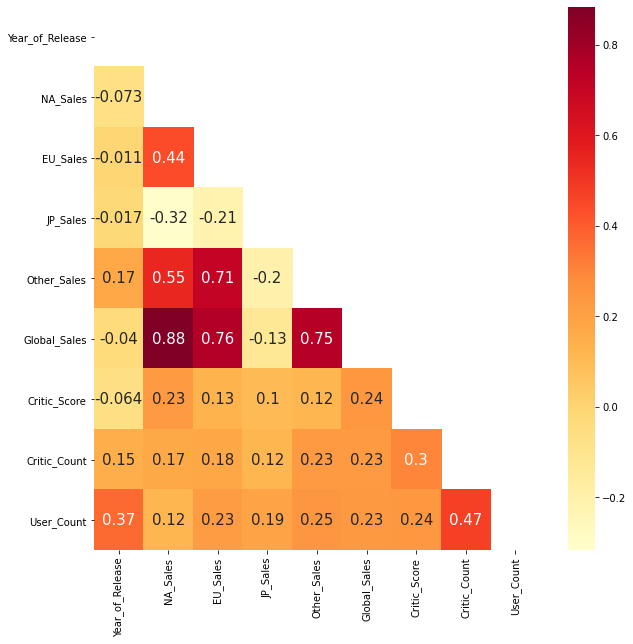

In [ ]:
#Correlation Heatmap

correlation_between_column = non_outlier_df[numeric_column].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_between_column, annot = True, cmap="YlOrRd",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

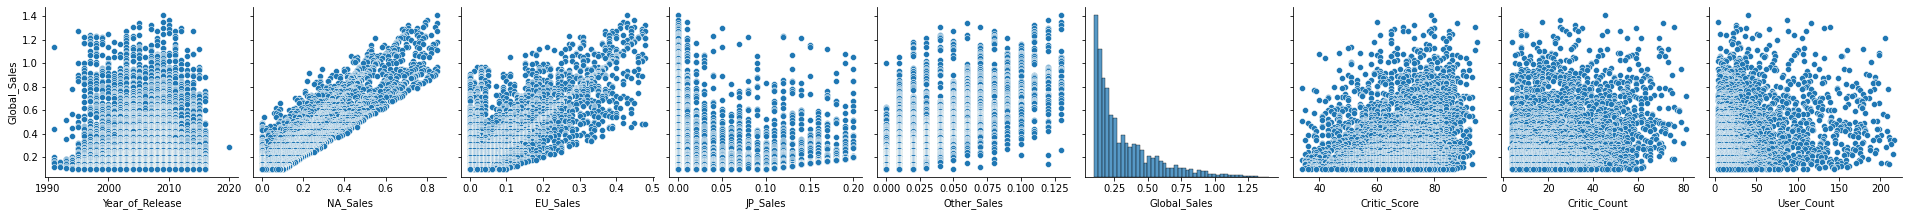

In [ ]:
# Check Linearity between target vs feature

scatter_plot_between_target_feature = sns.pairplot(data=non_outlier_df,
y_vars=['Global_Sales'],
x_vars=numeric_column,
height=3,
kind='scatter')

# **MACHINE LEARNING (REGRESI)**

In [ ]:
final_feature = ['Year_of_Release', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

In [ ]:
#Membuat Variabel Dummy
dfreg = pd.get_dummies(replaced_value_df[final_feature], drop_first=True)
dfreg.head()

,Year_of_Release,NA_Sales,EU_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1366,2009.0,0.85,0.43,0.13,1.41,79.0,45.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1412,2010.0,0.80,0.45,0.12,1.37,80.0,25.0,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1432,2009.0,0.79,0.42,0.13,1.35,60.0,17.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1454,2005.0,0.85,0.43,0.06,1.34,88.0,71.0,116.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1487,2007.0,0.71,0.48,0.13,1.32,73.0,32.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7365 entries, 1366 to 10826
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_of_Release     7365 non-null   float64
 1   NA_Sales            7365 non-null   float64
 2   EU_Sales            7365 non-null   float64
 3   Other_Sales         7365 non-null   float64
 4   Global_Sales        7365 non-null   float64
 5   Critic_Score        7365 non-null   float64
 6   Critic_Count        7365 non-null   float64
 7   User_Count          7365 non-null   float64
 8   Platform_3DS        7365 non-null   uint8  
 9   Platform_DC         7365 non-null   uint8  
 10  Platform_DS         7365 non-null   uint8  
 11  Platform_GB         7365 non-null   uint8  
 12  Platform_GBA        7365 non-null   uint8  
 13  Platform_GC         7365 non-null   uint8  
 14  Platform_GEN        7365 non-null   uint8  
 15  Platform_N64        7365 non-null   uint8  
 16  Pl

In [ ]:
# Menentukan Variabel Dependen (target) dan Independen
target = dfreg['Global_Sales']
input = dfreg.drop(['Global_Sales'], axis=1)

In [ ]:
# split data kedalam data train and test dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=29)

In [ ]:
# Menyusun Model Regresi
model = LinearRegression()

In [ ]:
# train the data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediksi nilai y menggunakain trained model
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
# Menampilkan koefisien regresi masing-masing variabel independen dan intercept
print('Coefficients:\n',model.coef_)
print('\n')
print('Intercept:',model.intercept_)

Coefficients:
 [ 1.18674113e-03  9.46992625e-01  9.86012143e-01  8.45830436e-01
  1.96497575e-04  1.61018064e-04  8.82192711e-05  4.64885806e-02
  1.28155401e-01  2.04108858e-02  1.17657345e-01  1.55816666e-02
  1.21455674e-02  1.27333660e-01  2.85447462e-02  9.61422972e-02
  1.52431561e-01 -1.84767907e-02  3.09399184e-02  1.97903833e-02
  2.07028310e-02  9.25092015e-03  3.99477412e-02  4.49364368e-02
  1.27529861e-01  1.15049663e-01  1.46591563e-01  1.33200966e-01
  1.49691085e-01  8.79419640e-03  1.17097179e-02  2.09572120e-05
  3.71716142e-03 -1.44385837e-02  2.99693540e-03  1.49492797e-02
 -1.87135179e-03 -5.23077223e-03 -4.61826598e-03 -9.40640925e-03
  3.03075528e-02 -4.00413637e-03  2.64788641e-03 -3.58798273e-05
  1.94017674e-02]


Intercept: -2.3852482388415015


In [ ]:
# Evaluasi Model dengan Mean Square Error (MSE) dan R squared
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print("R squared :", metrics.r2_score(y_test,y_test_pred))

MSE : 0.001680154702264934
R squared : 0.9716273726896582
